In [1]:
#import dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

np.random.uniform()

0.0019301355419116817

In [2]:
# generate random set of latitudes and longtitudes in array
# zip obj packs each pair having same index in array into a tuple
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats,lngs))
lat_lngs

[(5.521412073561493, -56.205048066216435),
 (76.16404845726717, 108.13596440922544),
 (-84.21072141193568, 73.62825672282946),
 (89.63809725297796, -6.23527271261014),
 (-54.367196232231336, 13.53858933157042),
 (61.797435342201425, 50.496841729066034),
 (54.97139903274376, 95.30999471942408),
 (-15.539059880901519, 92.73988319577484),
 (-81.25289656095394, 64.48068288865412),
 (-80.25297951593359, -1.5193557562324713),
 (-11.819653210536785, 73.0501658480332),
 (-87.04315115036295, 0.10213903200428831),
 (19.54024096181284, 106.6533749442982),
 (-54.7103479497432, -109.48499359249867),
 (67.09592704517519, 103.31734206191601),
 (-13.85284365282692, 129.98925687371445),
 (-20.515943031514283, -176.7202278749604),
 (-15.224522378252232, -22.408818496894924),
 (74.66784455328226, -89.68278483707249),
 (1.732942534273846, 177.36762435040424),
 (-40.11356488482404, -138.11655985145768),
 (77.21537105845024, -4.304341401403207),
 (57.50730382398308, 80.37222222733982),
 (-1.4252317981165277

In [3]:
#add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
   

totness sr
khatanga ru
taolanaro mg
barentsburg sj
hermanus za
zelenets ru
aginskoye ru
bengkulu id
taolanaro mg
hermanus za
hithadhoo mv
hermanus za
thanh hoa vn
castro cl
tura ru
port keats au
vaini to
georgetown sh
qaanaaq gl
rungata ki
rikitea pf
klaksvik fo
kedrovyy ru
atuona pf
urbano santos br
illoqqortoormiut gl
foz es
norman wells ca
komsomolskiy ru
ushuaia ar
karauzyak uz
dikson ru
inirida co
keshan cn
kupang id
gumushane tr
sitka us
mount gambier au
taolanaro mg
bambous virieux mu
butaritari ki
yalkhoy-mokhk ru
bathsheba bb
muros es
ornskoldsvik se
tasiilaq gl
yellowknife ca
port alfred za
busselton au
katha mm
nordstemmen de
aguimes es
oyama jp
tasiilaq gl
illoqqortoormiut gl
narsaq gl
punta arenas cl
ossora ru
illoqqortoormiut gl
hobart au
saint-pierre pm
vaini to
suleja ng
mar del plata ar
bubaque gw
nome us
presidencia roque saenz pena ar
methoni gr
ushuaia ar
albany au
thurso ca
yellowknife ca
ixtapa mx
berlin us
miramar mx
busselton au
kantunilkin mx
peniche pt
mildura

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [7]:
#import requests library
import requests

#import API key
from config import weather_api_key

In [8]:
#starting url for weather map api call with addition of units=imperial for units of measurement
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b41bd20d784b4d5b020e13ee8989faf1


In [9]:
#import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [28]:
#create output file csv
output_data_file = "weather_data/cities.csv"

#range of latitudes and longtitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [29]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval   ")
print("-----------------------------")

#create counters for first iteration of logging for each recorded responsed and set start at 1
record_count = 1
set_count = 1

#create for Loop through all the cities in list to get index of city for logging purposes and city for creating endpoint URL
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes; if remainder of index dividied by 50 is = 0, if index > or = to 50. if true counts are incremented by 1
    if (i % 50 == 0 and i >= 50):
        set_count =+1
        record_count = 1
        time.sleep(60)
        
    #create endpoint url with each city, remove blank spaces in city name and concatenating the city name wity city.replace
    city_url = url + "&q=" + city.replace(" ","+")
    
    #print statement tells/log the url, record count, and set count numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count before next city is processed
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
-----------------------------
Processing Record 1 of Set 1 | totness
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | zelenets
Processing Record 7 of Set 1 | aginskoye
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | thanh hoa
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | port keats
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | rungata
City not found. Skipping...
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | kedrovyy
Processing Record 21 of Set 1 | atuona
Processing

In [30]:
#create a dictionary for establishing dataframe
city_data_df = {
    "City": city.title(),
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date}
#convert array of dictionaries to a pd dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Totness,5.8833,-56.3167,77.49,83,100,6.15,SR,2021-10-31 08:16:03
1,Khatanga,71.9667,102.5000,4.71,97,98,4.56,RU,2021-10-31 08:16:03
2,Hermanus,-34.4187,19.2345,73.80,65,92,3.06,ZA,2021-10-31 08:16:04
3,Zelenets,61.8849,50.7489,41.25,96,100,8.72,RU,2021-10-31 08:16:04
4,Aginskoye,51.1000,114.5300,38.98,31,36,7.07,RU,2021-10-31 08:16:05
5,Bengkulu,-3.8004,102.2655,81.57,82,100,6.62,ID,2021-10-31 08:16:05
6,Hithadhoo,-0.6000,73.0833,77.86,90,100,20.24,MV,2021-10-31 08:16:05
7,Thanh Hoa,19.8000,105.7667,71.31,92,100,5.46,VN,2021-10-31 08:16:06
8,Castro,-24.7911,-50.0119,58.37,97,100,8.95,BR,2021-10-31 08:16:06
9,Tura,25.5198,90.2201,77.13,47,0,3.98,IN,2021-10-31 08:16:06


In [31]:
#create a dataframe from dicitionary and output file to csv
city_data=pd.DataFrame(city_data_df)

#display count of weather data values
city_data.count()


City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [48]:
#export the city_data into a csv
city_data_df.to_csv('output_data_file.csv') 

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

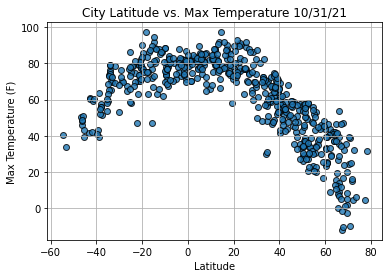

In [52]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

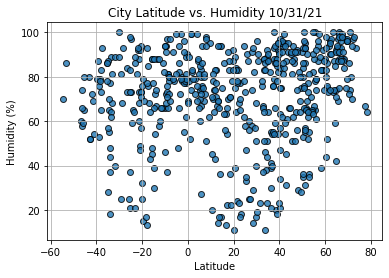

In [53]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

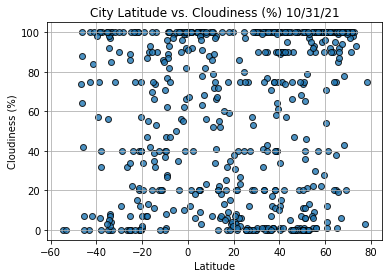

In [54]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

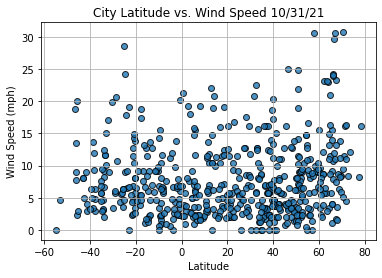

In [55]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()